In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")

In [3]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(15)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


In [6]:
import seaborn as sns

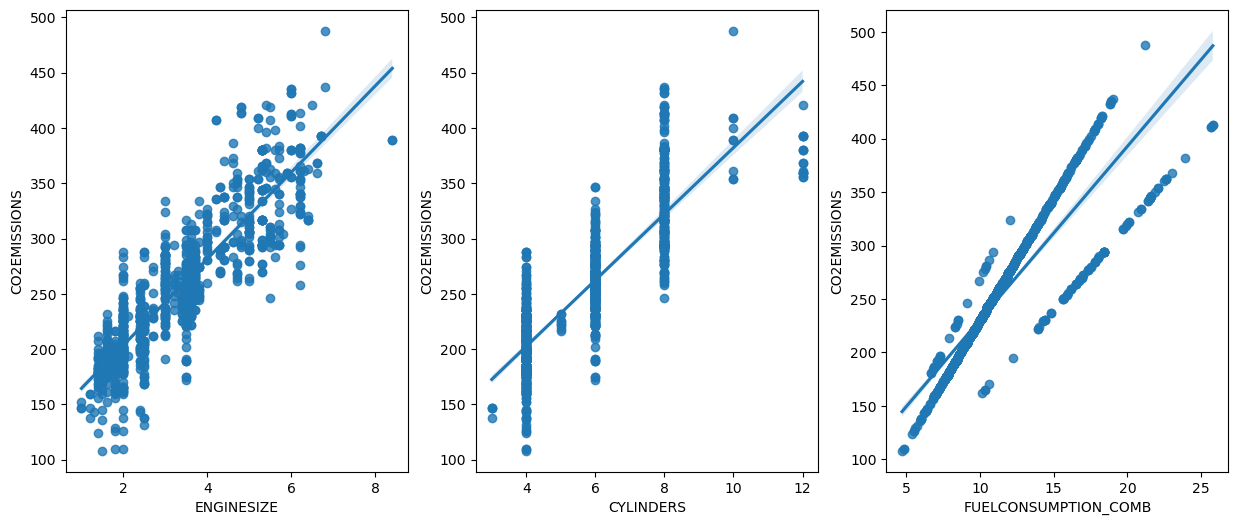

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(131)
sns.regplot(x='ENGINESIZE',y='CO2EMISSIONS',data=cdf)
plt.subplot(132)
sns.regplot(x='CYLINDERS',y='CO2EMISSIONS',data=cdf)
plt.subplot(133)
sns.regplot(x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',data=cdf)
plt.show()

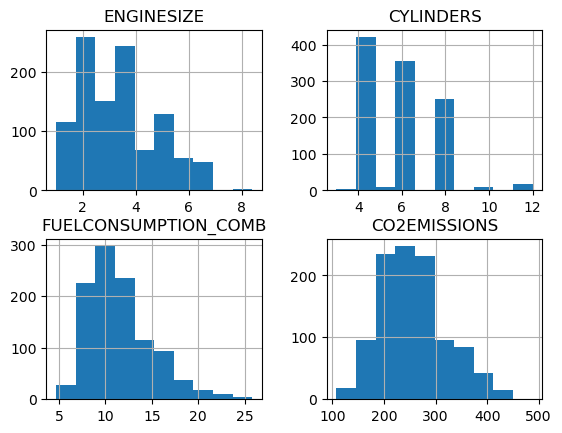

In [8]:
cdf.hist()
plt.show()

In [9]:
import sklearn

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y = cdf['CO2EMISSIONS']
x = cdf[['ENGINESIZE']]

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
slr = LinearRegression()

In [15]:
slr.fit(x_train,y_train)

LinearRegression()

In [16]:
slr.coef_

array([38.99297872])

In [17]:
slr.intercept_

126.2897021740873

<AxesSubplot:xlabel='ENGINESIZE', ylabel='CO2EMISSIONS'>

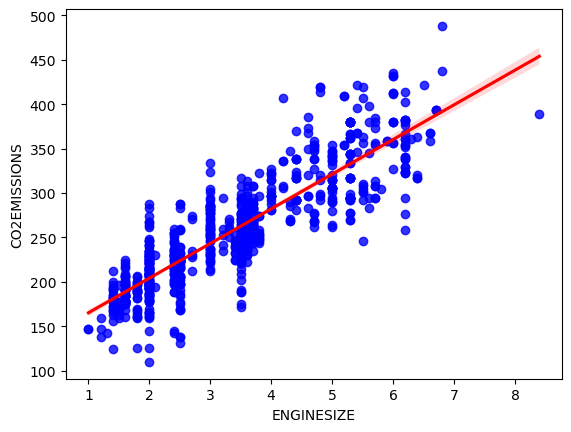

In [18]:
sns.regplot(x=x_train['ENGINESIZE'],y=y_train,scatter_kws={'color':'blue'},line_kws={'color':'red'})

In [19]:
y_test_p = slr.predict(x_test)

In [20]:
from sklearn.metrics import r2_score

In [21]:
Rsq = r2_score(y_test,y_test_p)

In [22]:
Rsq

0.7615595731934374

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
MSE = mean_squared_error(y_test,y_test_p)

In [25]:
MAE = mean_absolute_error(y_test,y_test_p)

<AxesSubplot:>

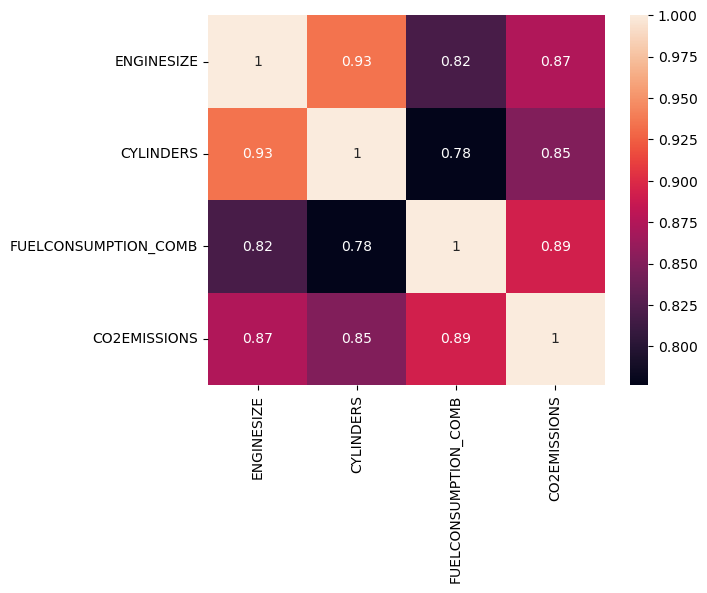

In [26]:
sns.heatmap(cdf.corr(),annot=True)

In [27]:
mlr = LinearRegression()

In [28]:
cdf1 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [29]:
X = cdf1[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]

In [30]:
X_train,X_test,y_train1,y_test1 = train_test_split(X,y,test_size=.2,random_state=40)

In [31]:
mlr.fit(X_train,y_train1)

LinearRegression()

In [32]:
mlr.coef_

array([13.50446249,  6.33835816,  8.96644316])

In [33]:
mlr.intercept_

69.73027993836695

In [34]:
y_test1_p = mlr.predict(X_test)

In [35]:
Rsqm = r2_score(y_test1,y_test1_p)

In [36]:
Rsqm

0.8555761658484278

In [37]:
MSEm = mean_squared_error(y_test1,y_test1_p)

In [38]:
MSEm

605.873642059901

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
df1 = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv")

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

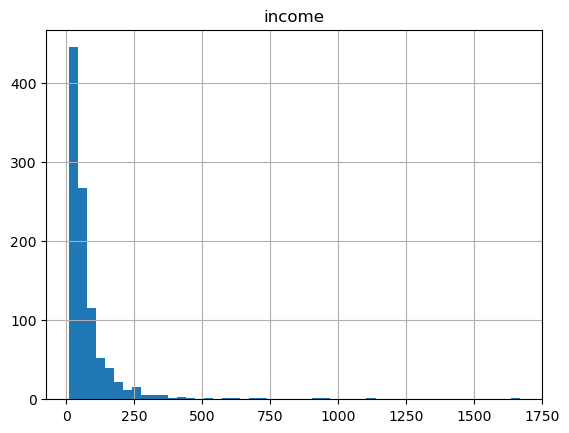

In [41]:
df1.hist(column='income',bins=50)

In [42]:
df1.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [43]:
X = df1.drop(columns='custcat')

In [44]:
y = df1['custcat']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=4)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler().fit(X_train)

In [48]:
X_train_norm = scaler.transform(X_train.astype(float))

In [49]:
knn = KNeighborsClassifier(n_neighbors=7)

In [50]:
knn.fit(X_train_norm,y_train)

KNeighborsClassifier(n_neighbors=7)

In [51]:
scaler1 = StandardScaler().fit(X_test)

In [52]:
X_test_norm = scaler1.transform(X_test.astype(float))

In [53]:
y_hat = knn.predict(X_test_norm)

In [54]:
y_hat

array([1, 3, 3, 2, 4, 4, 4, 4, 2, 4, 1, 4, 3, 2, 3, 1, 3, 4, 3, 1, 3, 2,
       1, 1, 4, 3, 2, 1, 1, 1, 3, 1, 4, 2, 1, 2, 3, 1, 2, 2, 1, 2, 1, 1,
       4, 1, 3, 1, 4, 4, 2, 1, 2, 1, 2, 2, 3, 3, 1, 4, 1, 4, 2, 1, 3, 4,
       1, 3, 3, 1, 1, 3, 4, 3, 1, 1, 4, 1, 4, 3, 3, 4, 2, 1, 1, 1, 3, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 3, 2, 4, 3, 1, 1, 4, 2, 2, 2, 2,
       1, 3, 2, 4, 1, 2, 1, 1, 2, 3, 4, 3, 2, 3, 1, 1, 2, 3, 1, 2, 3, 1,
       1, 4, 3, 2, 4, 1, 1, 2, 1, 3, 4, 3, 1, 2, 1, 1, 2, 2, 1, 4, 4, 2,
       2, 3, 3, 3, 3, 1, 2, 1, 2, 1, 1, 4, 1, 1, 3, 1, 1, 4, 1, 2, 2, 2,
       1, 4, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 4, 1, 3, 1, 3, 3, 3, 4, 1, 3,
       2, 3], dtype=int64)

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_test,y_hat)

array([[26,  7, 13,  5],
       [ 9, 16,  7, 12],
       [22, 10, 17,  5],
       [20, 11,  9, 11]], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test,y_hat)

0.35

In [59]:
k = list(range(1,21))

In [60]:
acc = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_norm,y_train)
    y_hat = knn.predict(X_test_norm)
    acc.append(accuracy_score(y_test,y_hat))
acc

[0.32,
 0.315,
 0.335,
 0.33,
 0.34,
 0.335,
 0.35,
 0.34,
 0.335,
 0.345,
 0.345,
 0.33,
 0.31,
 0.295,
 0.325,
 0.32,
 0.335,
 0.34,
 0.35,
 0.36]

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


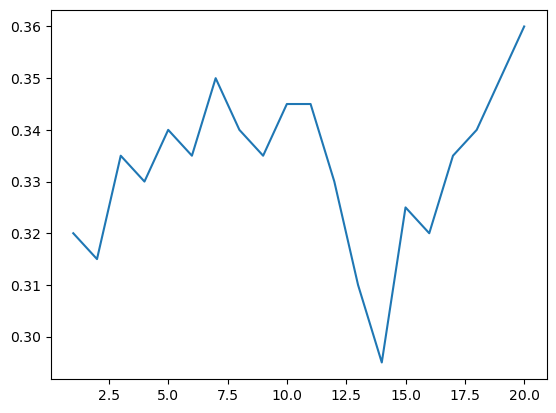

In [61]:
sns.lineplot(k,acc)
plt.show()

In [62]:
df1.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

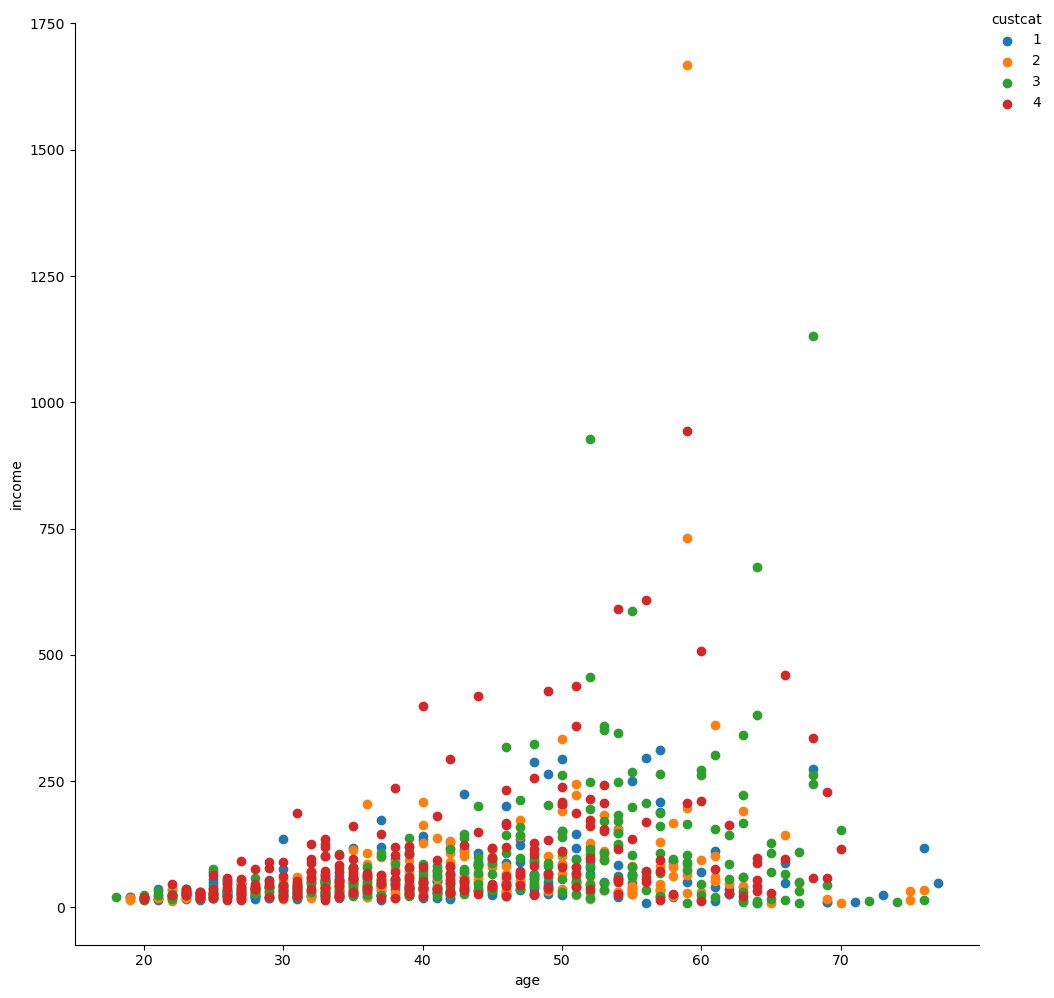

In [63]:
sns.FacetGrid(df1,height=10,hue='custcat').map(plt.scatter,'age','income').add_legend(loc='upper right')
plt.show()

<AxesSubplot:xlabel='employ', ylabel='income'>

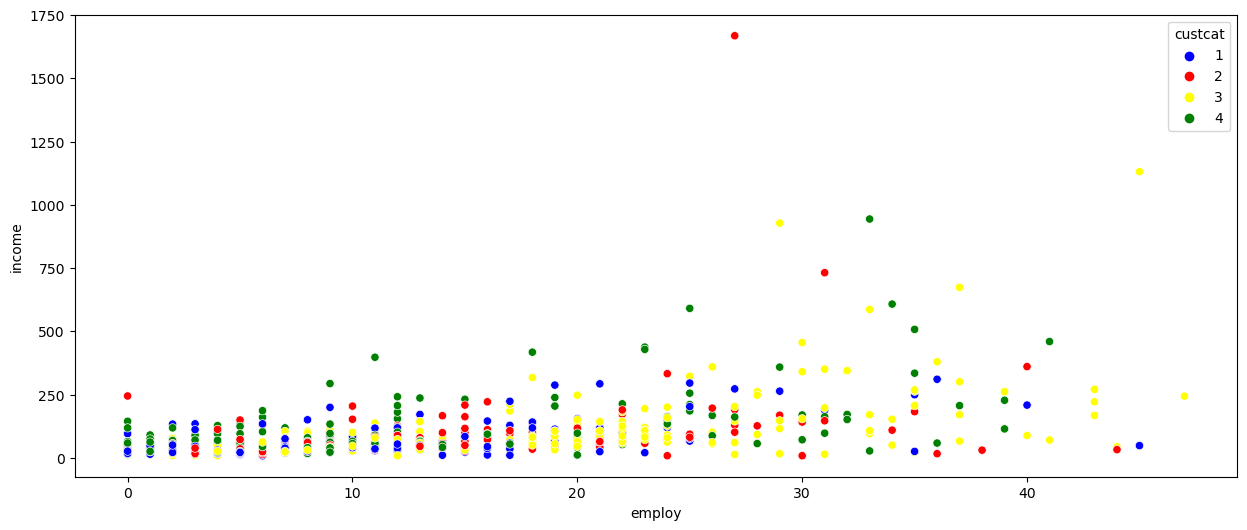

In [64]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='employ',y='income',hue='custcat',palette=['blue','red','yellow','green'],legend=True,data=df1)

In [65]:
df1

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


In [66]:
import sklearn.tree as tree

In [67]:
df2 = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv')

In [68]:
df2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [69]:
df2.shape

(200, 6)

In [70]:
X = df2.drop(columns='Drug')
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [71]:
X = pd.get_dummies(X,drop_first=True)

In [72]:
y = df2['Drug']

In [73]:
X

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0,0,0,0
1,47,13.093,1,1,0,0
2,47,10.114,1,1,0,0
3,28,7.798,0,0,1,0
4,61,18.043,0,1,0,0
...,...,...,...,...,...,...
195,56,11.567,0,1,0,0
196,16,12.006,1,1,0,0
197,52,9.894,1,0,1,0
198,23,14.020,1,0,1,1


In [74]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [75]:
dt = tree.DecisionTreeClassifier()

In [76]:
dt.fit(X_trainset,y_trainset)

DecisionTreeClassifier()

In [77]:
y_hat = dt.predict(X_testset)

In [78]:
y_hat

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'drugY',
       'drugA', 'drugB', 'drugA', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugX', 'drugB', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY',
       'drugC', 'drugY', 'drugA', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugB', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugX'], dtype=object)

In [79]:
print(y_hat[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [80]:
accuracy_score(y_testset,y_hat)

0.9833333333333333

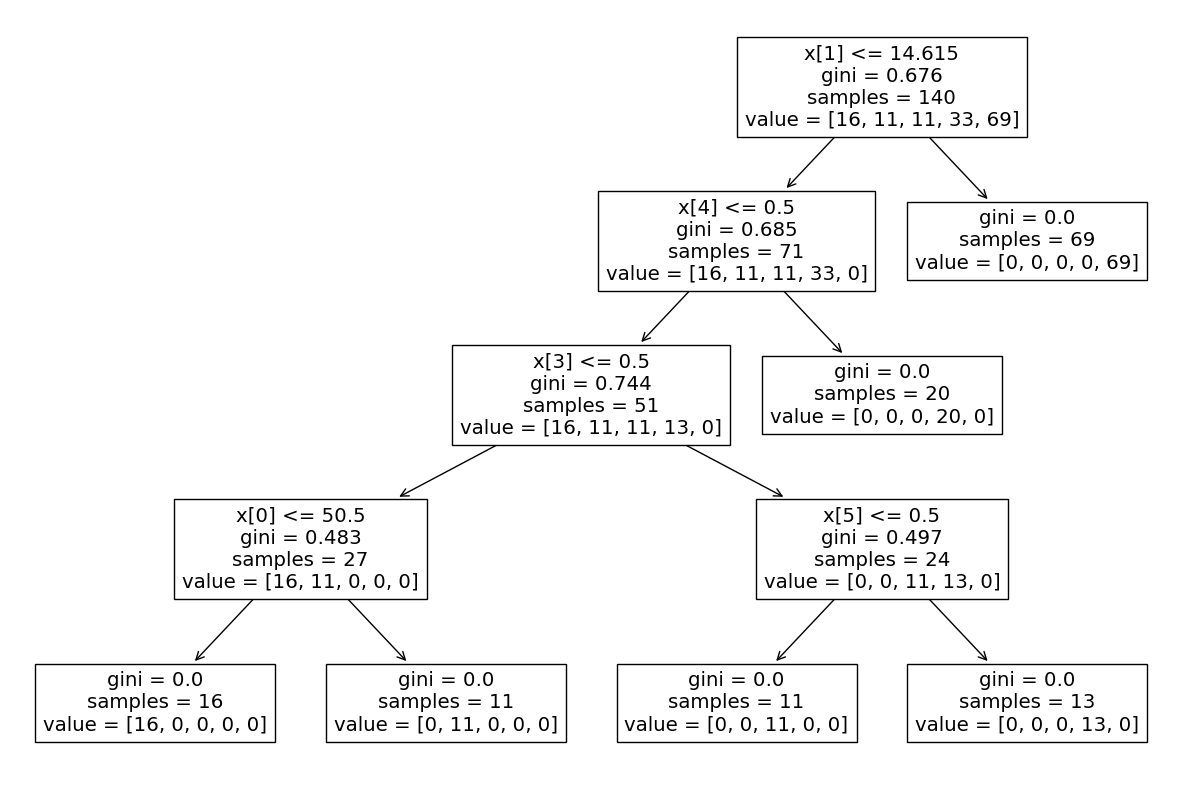

In [81]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt)
plt.show()

In [82]:
import opendatasets as od

In [83]:
od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

Skipping, found downloaded files in ".\creditcardfraud" (use force=True to force download)


In [84]:
raw_data = pd.read_csv('creditcardfraud/creditcard.csv')

In [85]:
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [86]:
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, 10, axis=0), columns=raw_data.columns)

In [87]:
big_raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848065,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0.0
2848066,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0.0
2848067,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0.0
2848068,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


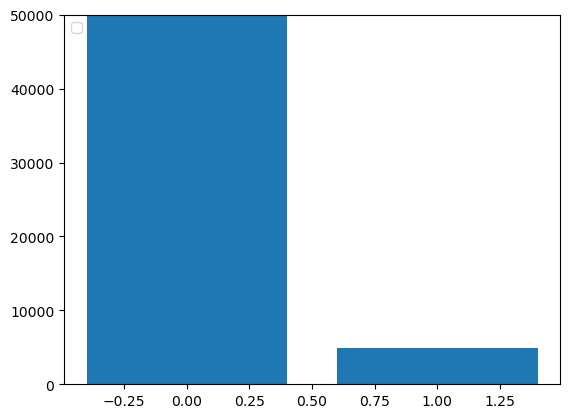

In [88]:
plt.bar(height=big_raw_data['Class'].value_counts().values,x=big_raw_data['Class'].value_counts().index.astype(int))
plt.ylim(0,50000)
plt.legend(loc='upper left')
plt.show()

In [89]:
type(big_raw_data['Class'].value_counts().values)

numpy.ndarray

In [90]:
big_raw_data['Class'].value_counts().index

Float64Index([0.0, 1.0], dtype='float64')

In [91]:
df3 = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/real_estate_data.csv")

In [92]:
df3

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [93]:
df3.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

In [94]:
df3.dropna(inplace=True)

In [95]:
df3.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [96]:
df3.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [108]:
X1 = df3.drop(columns='MEDV')

In [110]:
y1 = df3['MEDV']

In [133]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=.2,random_state=0)

In [134]:
rt = tree.DecisionTreeRegressor(criterion='squared_error')

In [135]:
rt.fit(X1_train,y1_train)

DecisionTreeRegressor()

In [136]:
y1_hat = rt.predict(X1_test)

In [137]:
r2_score(y1_test,y1_hat)

0.8223298930386529

In [138]:
X1_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4,437,21.2,16.90
360,4.54192,0.0,18.10,0.0,0.770,6.398,88.0,2.5182,24,666,20.2,7.79
81,0.04462,25.0,4.86,0.0,0.426,6.619,70.4,5.4007,4,281,19.0,7.22
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4,255,14.4,2.97
421,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24,666,20.2,15.70
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5,384,20.9,18.66
153,2.14918,0.0,19.58,0.0,0.871,5.709,98.5,1.6232,5,403,14.7,15.79
76,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5,398,18.7,11.97
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4,337,16.1,4.67


In [139]:
rt.score(X1_test,y1_test)

0.8223298930386529

In [140]:
df4 = pd.read_csv( "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")

In [141]:
df4

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [143]:
churn_df = df4[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]

In [148]:
churn_df['churn'] = churn_df['churn'].astype('int64')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7108\958471011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn'] = churn_df['churn'].astype('int64')


In [149]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   churn     200 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.8 KB


In [150]:
X2 = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]

In [151]:
y2 = churn_df['churn']

In [152]:
scaler2 = StandardScaler().fit(X2)

In [153]:
X2_norm = scaler2.transform(X2)

In [154]:
X2_norm

array([[-1.13518441, -0.62595491, -0.4588971 , ...,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, ..., -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , ..., -1.42318853,
        -0.92053635, -0.85972695],
       ...,
       [-1.36680743, -0.7026181 , -0.16283445, ..., -1.42318853,
        -0.02518185, -0.85972695],
       [-0.53296457, -0.85594447, -1.14970993, ...,  0.91629947,
        -0.58477841, -0.85972695],
       [ 1.18104577,  0.67731925,  0.42929083, ..., -0.6433592 ,
         1.31784991,  1.16316   ]])

In [155]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_norm,y2,test_size=.2,random_state=4)

In [156]:
from sklearn.linear_model import LogisticRegression

In [161]:
lgr = LogisticRegression(C=.01,solver='liblinear')

In [162]:
lgr.fit(X2_train,y2_train)

LogisticRegression(C=0.01, solver='liblinear')

In [163]:
y2_hat = lgr.predict(X2_test)
y2_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [171]:
confusion_matrix(y2_test,y2_hat,labels=[1,0])

array([[ 6,  9],
       [ 1, 24]], dtype=int64)

In [166]:
y2_hat_prob = lgr.predict_proba(X2_test)
y2_hat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

In [167]:
from sklearn.metrics import jaccard_score

In [169]:
jaccard_score(y2_test,y2_hat,pos_label=0)

0.7058823529411765

[Text(0, 0.5, '1'), Text(0, 1.5, '0')]

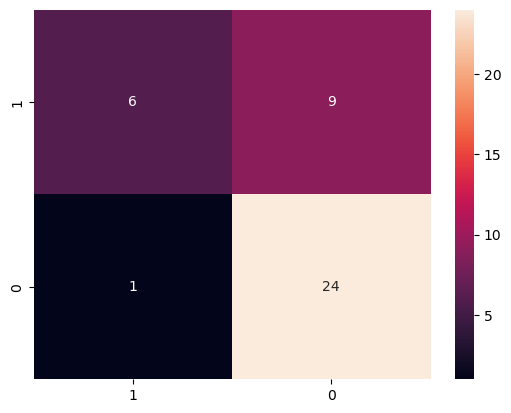

In [190]:
ax = sns.heatmap(confusion_matrix(y2_test,y2_hat,labels=[1,0]),annot=True,fmt='g')
ax.xaxis.set_ticklabels([1,0])
ax.yaxis.set_ticklabels([1,0])

In [191]:
from sklearn.metrics import classification_report

In [193]:
print(classification_report(y2_test,y2_hat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40

